# Task 1: Data Preparation


## Retrive data from the CSV file

In [3]:
import pandas as pd # import pandas package and define an alias 'pd' for convenience
import matplotlib.pyplot as plt # import pyplot and define an alias 'plt' for convenience
import seaborn as sns # import seaborn package and define an alias 'sns' for convenience

# Load a CSV file into the data frame object
# 1. Download the A1 dataset from Canvas → Assignments → Assignment1 -> A1data.csv
# 2. Move the file to your home directory next to your .ipynb file
A1data_filename = 'A1data.csv'

# Read a local comma-separated values (CSV) file into DataFrame.
A1data = pd.read_csv(A1data_filename, sep=',', on_bad_lines='warn')

# Check if the A1data.csv file is loaded into the data frame and get a rough idea of its contents
A1data.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25%,10%,33%,1%,78%,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19%,2%,27%,0%,62%,2015-2016
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),43%,NaN,NaN,NaN,NaN,2011-2012
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71%,89%,44%,99%,2015-2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34%,31%,48%,8%,73%,2019


## Check the shape of data frame

In [5]:
# Check all the rows and columns are loading into the data frame
A1data.shape

(90, 11)

## Check the types of loaded columns 

In [7]:
## check the types of loaded columns
A1data.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                        object
Residence (Rural)            object
Residence (Urban)            object
Wealth quintile (Poorest)    object
Wealth quintile (Richest)    object
Time period                  object
dtype: object

## Get the names of columns

In [9]:
# Get the names of the columns
A1data.columns

Index(['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Income Group',
       'Total', 'Residence (Rural)', 'Residence (Urban)',
       'Wealth quintile (Poorest)', 'Wealth quintile (Richest)',
       'Time period'],
      dtype='object')

## Error Type 1: Removal of Leading and Trailing Characters if any

In [11]:
# Check and Remove leading and trailing characters if any, starting from Income Group column
start_column = 4
for col in A1data.columns[start_column:]:
    A1data[col] = A1data[col].str.strip()

## Error Type 2: Removal of duplicate rows

In [13]:
# Check for duplicate rows
duplicates = A1data[A1data.duplicated(subset=['ISO3', 'Countries and areas', 'Region', 'Sub-region'])]

print("Duplicate Rows:")
print(duplicates)

# Remove duplicate rows in the data frame
A1data = A1data.drop_duplicates(subset=['ISO3', 'Countries and areas', 'Region', 'Sub-region'])

A1data.shape

Duplicate Rows:
   ISO3 Countries and areas Region Sub-region              Income Group Total  \
30  GTM           Guatemala    LAC        LAC  Upper middle income (UM)   10%   
75  TGO                Togo    SSA        WCA            Low income (L)   24%   
76  TGO                Togo    SSA        WCA            Low income (L)   24%   

   Residence (Rural) Residence (Urban) Wealth quintile (Poorest)  \
30                3%               20%                        0%   
75                8%               49%                        0%   
76                8%               49%                        0%   

   Wealth quintile (Richest) Time period  
30                       49%   2014-2015  
75                       78%        2017  
76                       78%        2017  


(87, 11)

## Error Type 3: Income Group Outliers

In [15]:
# Detect outliers using the frequency for the Income Group column
A1data['Income Group'].value_counts()

Income Group
Upper middle income (UM)     32
Lower middle income (LM)     28
Low income (L)               18
High income (H)               7
Lower middle income (LLM)     1
Lower middle income (LMM)     1
Name: count, dtype: int64

In [16]:
# Fix the errors in the Income Group column since it contains 6 groups instead of 4
A1data['Income Group'] = A1data['Income Group'].replace('Lower middle income (LLM)', 'Lower middle income (LM)') 
A1data['Income Group'] = A1data['Income Group'].replace('Lower middle income (LMM)', 'Lower middle income (LM)') 

# Check if the outliers are fixed in the Income Group
A1data['Income Group'].value_counts()

Income Group
Upper middle income (UM)    32
Lower middle income (LM)    30
Low income (L)              18
High income (H)              7
Name: count, dtype: int64

### Error Type 3: Percentage Validation (0 <= 'Valid Percentage' <= 100)

In [18]:
# Check the range of percentage value is between 0 and 100, if not replace with -1%(invalid) for all percentage columns
A1data = A1data.fillna('-1%')

issue_col = []
start_column = 5
end_column = 10
for col in A1data.columns[start_column:end_column]:
    A1data.loc[(A1data[col].str.rstrip('%').astype(int) < 0) | (A1data[col].str.rstrip('%').astype(int) > 100), col] = pd.NA
    

### Error Type 4: Detect Incorrect Percentage Values using Box Plot and fix the Extreme Values

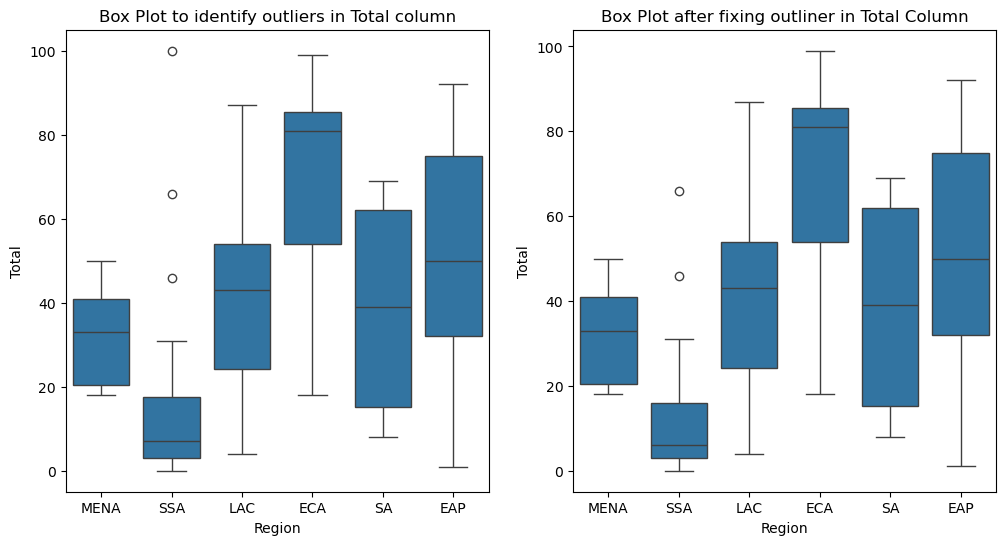

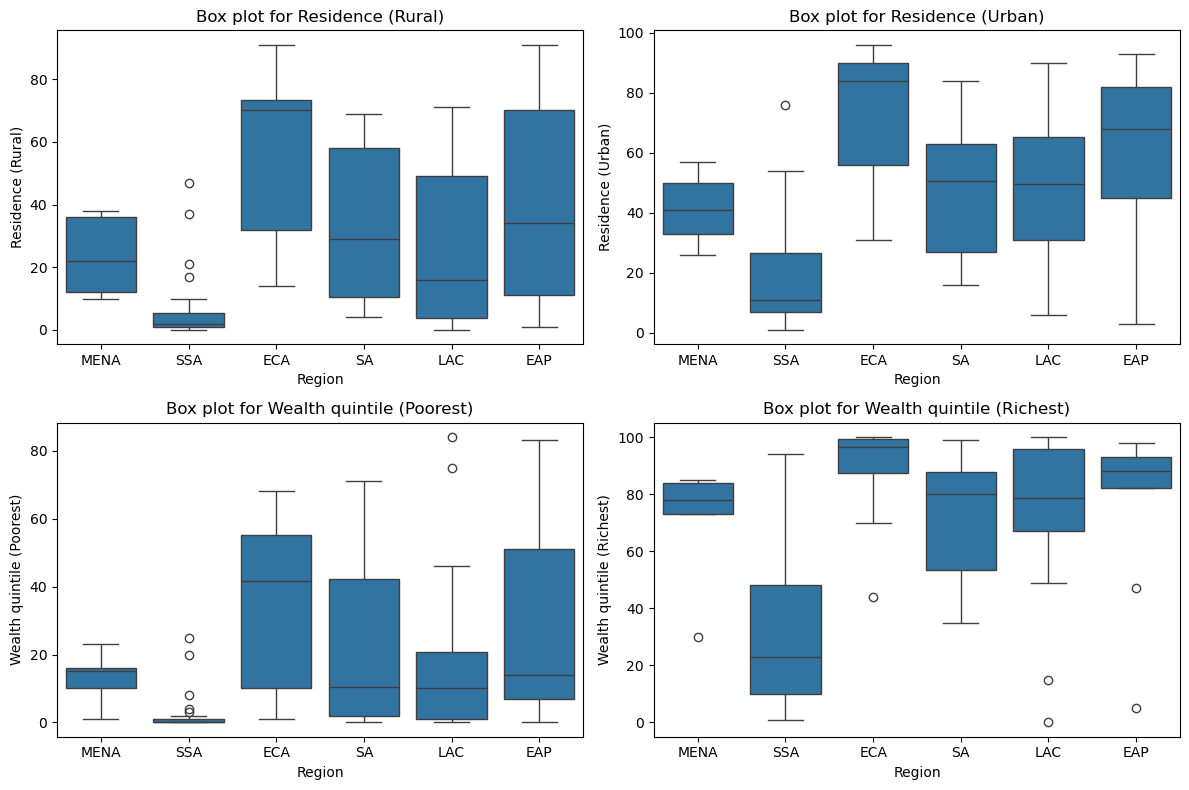

In [20]:
# Use the box plot to find the outliers in the Total column

# Convert the total string to an integer
A1data['Total'] = A1data['Total'].str.rstrip('%').astype(int)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Draw a boxplot for the Total per region to identify the outliers
sns.boxplot(x='Region', y='Total', data=A1data, ax=axes[0])
axes[0].set_title('Box Plot to identify outliers in Total column', fontsize=12)

A1data['Total'] = A1data['Total'].astype(str) + '%'

# Check if the extreme values are true if not replace them with null to fix the outliners
# Rule 1: If the Total is 100%, both Rural and Urban should also be 100%
A1data = A1data[~((A1data['Total'] == '100%') & ((A1data['Residence (Rural)'] != '100%') | (A1data['Residence (Urban)'] != '100%')))]

# Rule 2: If both Rural and Urban are 100%, Total should be 100%
A1data = A1data[~((A1data['Residence (Rural)'] == '100%') & (A1data['Residence (Urban)'] == '100%') & (A1data['Total'] != '100%'))] 

A1data['Total'] = A1data['Total'].str.rstrip('%').astype(int)

# Check outliner is fixed using boxplot
sns.boxplot(x='Region', y='Total', data=A1data, ax=axes[1])
axes[1].set_title('Box Plot after fixing outliner in Total Column', fontsize=12)

A1data['Total'] = A1data['Total'].astype(str) + '%'

# Copy the original data frame and drop the null values
A1data_copy = A1data.copy()
A1data = A1data.dropna()

# Draw Box plot for columns (Residence (Rural), Residence (Urban), Wealth quintile (Poorest), Wealth quintile (Richest)) to check outliners
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
columns_to_plot = A1data.columns[6:10]
for index, col in enumerate(columns_to_plot):
    row_index, col_index = divmod(index, 2)  # Determine subplot grid position
    # Use the box plot to find the outliers in the Residence (Rural) column
    A1data[col] = A1data[col].str.rstrip('%').astype(int)
    sns.boxplot(x='Region', y=col, data=A1data, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title('Box plot for ' + col)
    A1data[col] = A1data[col].astype(str) + '%'

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Copy back the original data frame to A1data
A1data = A1data_copy

### Error Type 5: Split the Time Period Column and fix the invalid years

(85, 12)


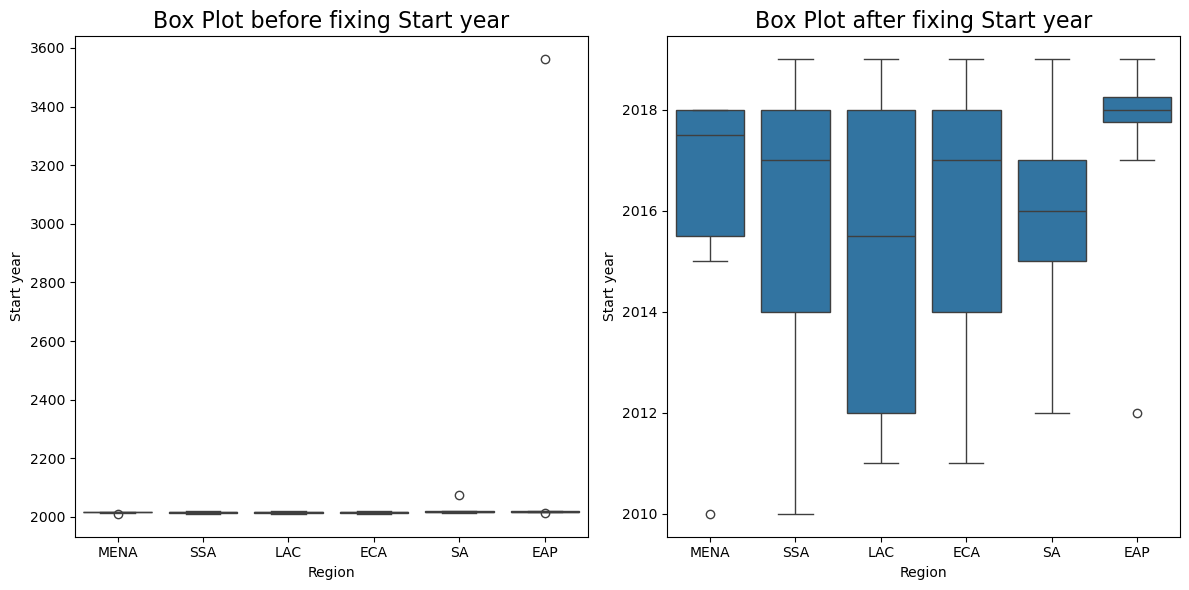

(83, 12)


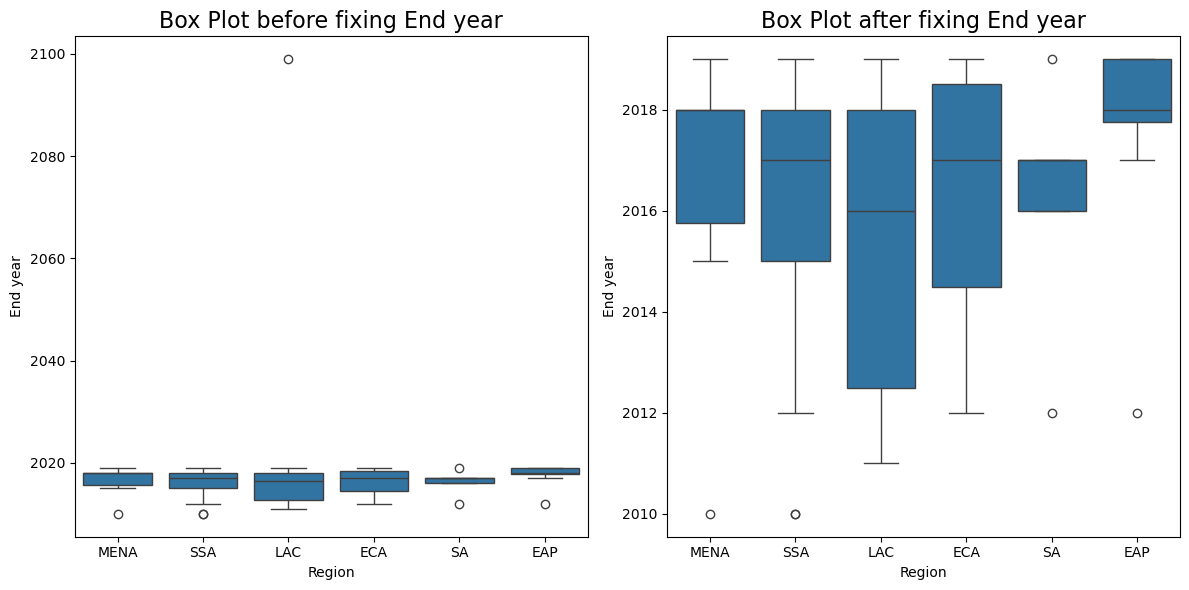

(82, 12)


In [22]:
# Split the "time period" column into "Start year" and "End year" columns 
A1data[['Start year', 'End year']] = A1data['Time period'].str.split('-', expand=True)

# if "time period" contains one year, then fill both "Start year" and "End year" with the same date
A1data['End year'] = A1data['End year'].fillna(A1data['Start year'])

# Drop "Time period" column
A1data = A1data.drop(columns=['Time period'])

# Get the current year
current_year = pd.Timestamp.now().year

# Drop observation for an invalid start year and invalid end year 
start_column = -2
for col in A1data.columns[start_column:]:
    # Convert the Start year string to an integer
    A1data[col] = A1data[col].astype(int)
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Draw a boxplot for the Start year per region to identify the outliers
    sns.boxplot(x='Region', y=col, data=A1data, ax=axes[0])
    axes[0].set_title('Box Plot before fixing ' + col, fontsize=16)
    
    # Check for invalid Start year based on the box plot
    valid_years = (A1data[col].astype(int) >= 1900) & (A1data[col].astype(int) <= current_year)
    print(A1data.shape)

    # Remove the observation for an invalid year
    A1data = A1data[valid_years]

    # Check outliner is fixed using boxplot
    sns.boxplot(x='Region', y=col, data=A1data, ax=axes[1])
    axes[1].set_title('Box Plot after fixing ' + col, fontsize=16)

    # Display the plots
    plt.tight_layout()
    plt.show()

    # Convert the integer back to a string
    A1data[col] = A1data[col].astype(str) 

print(A1data.shape)

### Error Type 6: Handle Missing values

In [24]:
# Define the percentage columns
percentage_columns = ['Total', 'Residence (Rural)', 'Residence (Urban)', 'Wealth quintile (Poorest)', 'Wealth quintile (Richest)']

# Drop rows where 3 or more of the percentage columns are missing
A1data = A1data.dropna(subset=percentage_columns, thresh=len(percentage_columns)-2)

A1data_ori = A1data.copy()
A1data = A1data.fillna('0%')

# Fill missing values with the mean calculated within each region
start_column = 6 # Total
end_column = 11  # Wealth quintile (Richest)
for col in A1data.columns[start_column:end_column]:
    A1data[col] = A1data[col].str.rstrip('%').astype(int)
    # Group by 'Region'
    group = A1data.groupby('Region')
    # Count the number of members in each group
    grouped_count = group.count()
    # Count the sum of percentange in each group
    grouped_sum = group.sum()
    # Find mean for each group
    grouped_mean = grouped_sum[col]/grouped_count[col]
    grouped_mean = grouped_mean.round().astype(int)

    A1data[col] = A1data[col].astype(str) + '%'

    tuple = A1data['Region'].unique()

    # Fill na with the mean calculated within each group
    for reg in tuple:
        # Fill NaN in 'Values' based on a condition from 'Region'
        A1data_ori.loc[A1data_ori['Region'] == reg, col] = A1data_ori.loc[A1data_ori['Region'] == reg, col].fillna(grouped_mean[reg].astype(str) + '%')

A1data = A1data_ori

### Error Type 7: Change the String datatype to Integer for percentage values

In [26]:
# Convert percentage string to numerical value
start_column = 5 # Total
end_column = 10  # Wealth quintile (Richest)
for col in A1data.columns[start_column:end_column]:
    A1data[col] = A1data[col].str.rstrip('%').astype(int)
print(A1data.dtypes)

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                         int32
Residence (Rural)             int32
Residence (Urban)             int32
Wealth quintile (Poorest)     int32
Wealth quintile (Richest)     int32
Start year                   object
End year                     object
dtype: object


#### Write object to a comma-separated values (csv) file

In [28]:
# Write data frame object into a CSV file
A1data.to_csv('s4085030-cleaned-A1data.csv', index=False)

print("DataFrame written to 's4085030-cleaned-A1data.csv'")


DataFrame written to 's4085030-cleaned-A1data.csv'


# Task 2: Data Exploration

## Task 2.1 

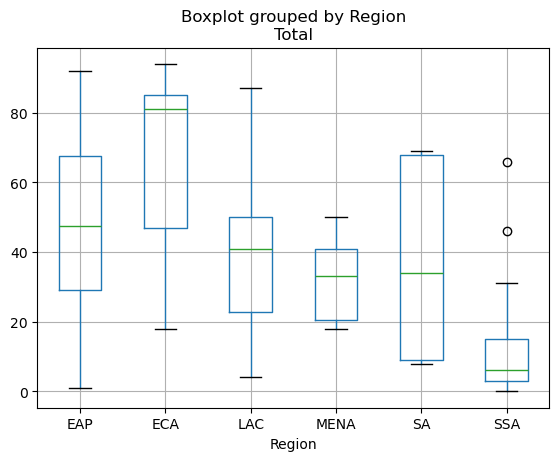

In [31]:
# Load the cleaned CSV file into the data frame object
A1data_clean_filename = 's4085030-cleaned-A1data.csv'

# Read a local comma-separated values (CSV) file into DataFrame.
A1data_clean = pd.read_csv(A1data_clean_filename, sep=',', on_bad_lines='warn')
A1data_clean = A1data_clean.dropna()

# Drow boxplot for Total column grouped by region
A1data_clean.boxplot(column='Total', by='Region')
plt.show()

## Task 2.2 

In [33]:
# Print the Mean values for Wealth quintile
print('Mean for Wealth quintile (Poorest):',A1data_clean['Wealth quintile (Poorest)'].mean(axis=0).round(2))
print('Mean for Wealth quintile (Richest):',A1data_clean['Wealth quintile (Richest)'].mean(axis=0).round(2))

# Sort the dataframe based on Wealth quintile (Poorest) column
A1_data_sorted = A1data_clean.sort_values(by='Wealth quintile (Poorest)', ascending=False)

# Print the Top 10 countries with the highest percentages for Wealth quintile (Poorest)
print('\nTop 10 countries with the highest percentages for Wealth quintile (Poorest)')
series = A1_data_sorted.head(10)['Countries and areas']
for i, value in enumerate(series, start=1):
    print(f"{i}. {value}")

# Sort the dataframe based on Wealth quintile (Richest) column
A1_data_sorted = A1data_clean.sort_values(by='Wealth quintile (Richest)', ascending=False)

# Print the Top 10 countries with the highest percentages for Wealth quintile (Richest)
print('\nTop 10 countries with the highest percentages for Wealth quintile (Richest)')
series = A1_data_sorted.head(10)['Countries and areas']
for i, value in enumerate(series, start=1):
    print(f"{i}. {value}")

Mean for Wealth quintile (Poorest): 17.14
Mean for Wealth quintile (Richest): 60.86

Top 10 countries with the highest percentages for Wealth quintile (Poorest)
1. Russian Federation
2. Brazil
3. Tonga
4. Chile
5. Sri Lanka
6. North Macedonia
7. Serbia
8. Japan
9. Kyrgyzstan
10. Montenegro

Top 10 countries with the highest percentages for Wealth quintile (Richest)
1. Bulgaria
2. Barbados
3. Serbia
4. North Macedonia
5. Chile
6. Armenia
7. Costa Rica
8. Colombia
9. Sri Lanka
10. Georgia


## Task 2.3 

### Box Plot to compare the statistics

Statistics Measures for rural
Mean: 12.25
Median: 7.0
Standard Deviation: 15.36

Statistics Measures for Urban
Mean: 29.29
Median: 25.5
Standard Deviation: 21.83


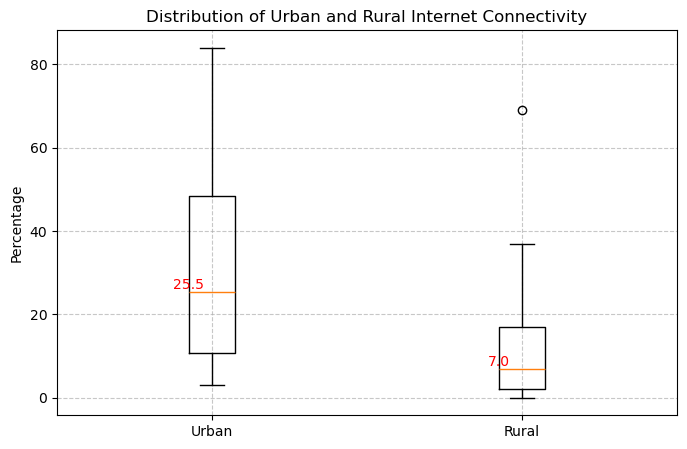

In [36]:
# Get the dataframe with only Lower middle income (LM) income group
A1_group = A1data_clean.groupby('Income Group').get_group('Lower middle income (LM)')

# Statistical Measures
mean_rural = round(A1_group['Residence (Rural)'].mean(), 2)
median_rural = round(A1_group['Residence (Rural)'].median(), 2)
std_rural = round(A1_group['Residence (Rural)'].std(), 2)

mean_urban = round(A1_group['Residence (Urban)'].mean(), 2)
median_urban = round(A1_group['Residence (Urban)'].median(), 2)
std_urban = round(A1_group['Residence (Urban)'].std(), 2)


print('Statistics Measures for rural')
print(f'Mean: {mean_rural}')
print(f'Median: {median_rural}')
print(f'Standard Deviation: {std_rural}')

print('\nStatistics Measures for Urban')
print(f'Mean: {mean_urban}')
print(f'Median: {median_urban}')
print(f'Standard Deviation: {std_urban}')

# Create box plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.grid(True, linestyle='--', alpha=0.7)
box_props = plt.boxplot([A1_group['Residence (Urban)'], A1_group['Residence (Rural)']], labels=['Urban', 'Rural'])
plt.title("Distribution of Urban and Rural Internet Connectivity")
plt.ylabel("Percentage")

# Add median values to the plot
for box in box_props['medians']:
    y = box.get_ydata()
    x = box.get_xdata()[0]
    plt.text(x, y[0], f'{y[0]:.1f}', ha='center', va='bottom', color='red')
    
plt.show()



### Histogram and Kernel Density Estimation plot to compare the statistics

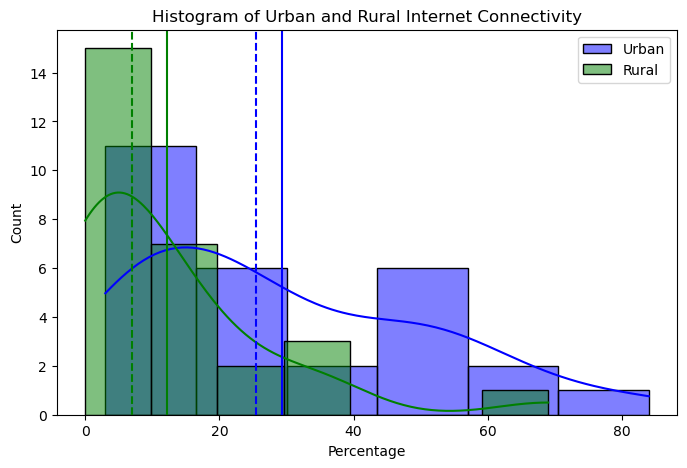

Skewness for rural: 2.09
Skewness for urban: 0.76


In [38]:
from scipy.stats import skew

# Draw Histogram for Urban and Rural percentages
plt.figure(figsize=(8, 5))
sns.histplot(A1_group['Residence (Urban)'], color='blue', label='Urban', kde=True)
sns.histplot(A1_group['Residence (Rural)'], color='green', label='Rural', kde=True)
plt.title("Histogram of Urban and Rural Internet Connectivity")
plt.xlabel("Percentage")
plt.legend()

# Calculate skewness
skew_rural = round(skew(A1_group['Residence (Rural)']), 2)
skew_urban = round(skew(A1_group['Residence (Urban)']), 2)

# Add mean line
plt.axvline(mean_rural, color='green', linestyle='-', label=f'Mean: {mean_rural:.2f}')
plt.axvline(mean_urban, color='b', linestyle='-', label=f'Mean: {mean_urban:.2f}')

# Add median line
plt.axvline(median_rural, color='green', linestyle='--', label=f'Median: {median_rural:.2f}')
plt.axvline(median_urban, color='b', linestyle='--', label=f'Median: {median_urban:.2f}')

plt.show()

print(f'Skewness for rural: {skew_rural}')
print(f'Skewness for urban: {skew_urban}')

### Line plot to compare the statistics

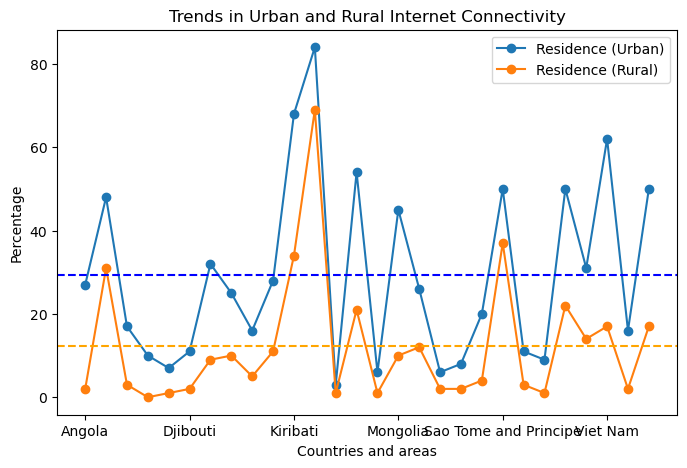

In [40]:
# Line plot for Urban and Rural percentages
mean_value = A1_group['Residence (Rural)'].mean()
mean_value1 = A1_group['Residence (Urban)'].mean()

A1_group.set_index('Countries and areas')[['Residence (Urban)', 'Residence (Rural)']].plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Trends in Urban and Rural Internet Connectivity")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.axhline(y=mean_rural, color='orange', linestyle='--', label=f'Mean rural: {mean_rural:.2f}')
plt.axhline(y=mean_urban, color='b', linestyle='--', label=f'Mean urban: {mean_urban:.2f}')
plt.show()